# 1. DNN

 `Fashion_mnist` 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라.

`1` 평가지표로 accuracy를 이용할 것

`2`  epoch는 10으로 설정할 것

`3` optimizer는 adam을 이용할 것

### 데이터 로드

In [1]:
import tensorflow as tf

from keras.backend import *
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.datasets import *
from keras.losses import *
from keras.optimizers import *

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

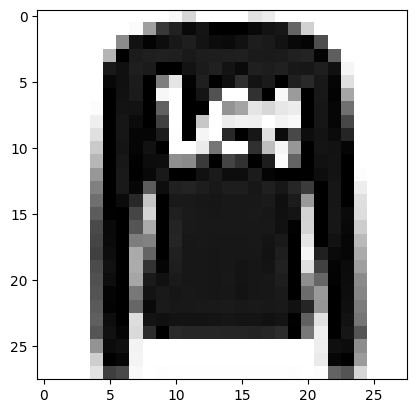

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(x_test[1], cmap = "Greys")

### 데이터 전처리

`-` MinMax scaler 금지 $\to$ 태블러 데이터에 최적화되어있기 때문

* 전처리 규칙은 train set을 따라야한다!

In [14]:
M, m = x_train.max(), x_train.min()

train_x  = ((x_train-m)/(M-m)).reshape(-1, 28, 28, 1)
test_x  = ((x_test-m)/(M-m)).reshape(-1, 28, 28, 1)

### 모델 설계

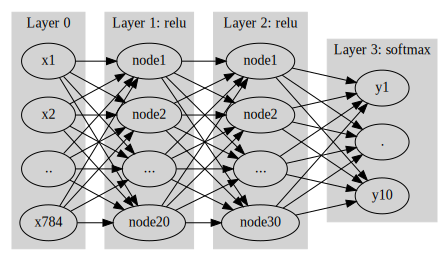

In [16]:
#| code-fold : false
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    "x784" -> "node1"

    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"

    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node20"
    "x2" -> "node20"
    ".." -> "node20"
    "x784" -> "node20"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "node1 "
    "node2" -> "node1 "
    "..." -> "node1 "
    "node20" -> "node1 "

    "node1" -> "node2 "
    "node2" -> "node2 "
    "..." -> "node2 "
    "node20" -> "node2 "

    "node1" -> "... "
    "node2" -> "... "
    "..." -> "... "
    "node20" -> "... "

    "node1" -> "node30 "
    "node2" -> "node30 "
    "..." -> "node30 "
    "node20" -> "node30 "


    label = "Layer 2: relu"
}
subgraph cluster_4{
    style=filled;
    color=lightgrey;

    "node1 " -> "y10"
    "node2 " -> "y10"
    "... " -> "y10"
    "node30 " -> "y10"

    "node1 " -> "y1"
    "node2 " -> "y1"
    "... " -> "y1"
    "node30 " -> "y1"

    "node1 " -> "."
    "node2 " -> "."
    "... " -> "."
    "node30 " -> "."

    label = "Layer 3: softmax"
}
''')

In [17]:
28*28

784

In [18]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [19]:
model.compile?

Object `model.compile` not found.


In [25]:
model = Sequential()

model.add(Flatten())
model.add(Dense(20, activation = "relu"))
model.add(Dense(30, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer = Adam(0.001), metrics = ["acc"], loss =  "sparse_categorical_crossentropy")

In [26]:
es  = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5, verbose = 1)

mc = ModelCheckpoint(monitor = "val_loss", filepath = "mnist_dnn.ckpt",
                                    save_best_only = True,  mode = "min", verbose = 1 )

### 모델 학습

In [31]:
history = model.fit(train_x, y_train, epochs = 10, validation_split = 0.2,
                                  callbacks = [es, mc]).history

Epoch 1/10
1485/1500 [============================>.] - ETA: 0s - loss: 0.3112 - acc: 0.8847
Epoch 1: val_loss did not improve from 0.35468
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3110 - acc: 0.8849 - val_loss: 0.3716 - val_acc: 0.8689
Epoch 2/10
1489/1500 [============================>.] - ETA: 0s - loss: 0.3018 - acc: 0.8887
Epoch 2: val_loss did not improve from 0.35468
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3020 - acc: 0.8888 - val_loss: 0.3825 - val_acc: 0.8664
Epoch 3/10
1483/1500 [============================>.] - ETA: 0s - loss: 0.2999 - acc: 0.8894
Epoch 3: val_loss did not improve from 0.35468
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2999 - acc: 0.8895 - val_loss: 0.3568 - val_acc: 0.8772
Epoch 4/10
1499/1500 [============================>.] - ETA: 0s - loss: 0.2959 - acc: 0.8922
Epoch 4: val_loss did not improve from 0.35468
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2958

## (2) 적합된 네트워크를 이용하여 test data의 accuracy를 구하라

In [36]:
result1 = model.predict(test_x)

313/313 [==============================] - 1s 2ms/step


In [38]:
result1 = np.argmax(result1, axis = 1)

In [44]:
from sklearn.metrics import *

accuracy_score(y_test, result1)

0.8652

## (3) 과적합인지 확인

`1` train_loss, val_loss 확인

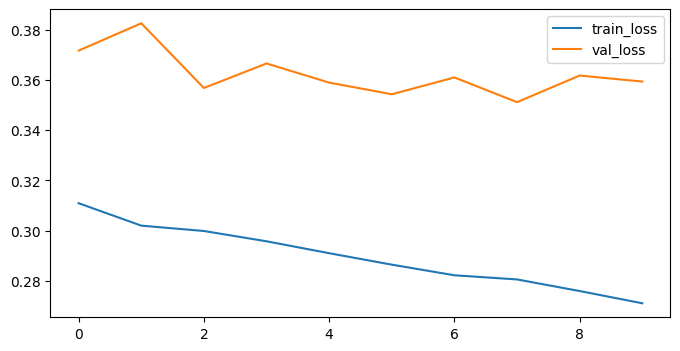

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,4))
plt.plot(history["loss"], label = "train_loss")
plt.plot(history["val_loss"], label = "val_loss")
plt.legend()
plt.show()

`2` 실젝값, 예측값 비교

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.96      0.97      0.97      1000
           2       0.81      0.73      0.76      1000
           3       0.87      0.86      0.87      1000
           4       0.75      0.82      0.78      1000
           5       0.95      0.96      0.96      1000
           6       0.69      0.62      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.91      0.97      0.94      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.86      0.87      0.86     10000
weighted avg       0.86      0.87      0.86     10000



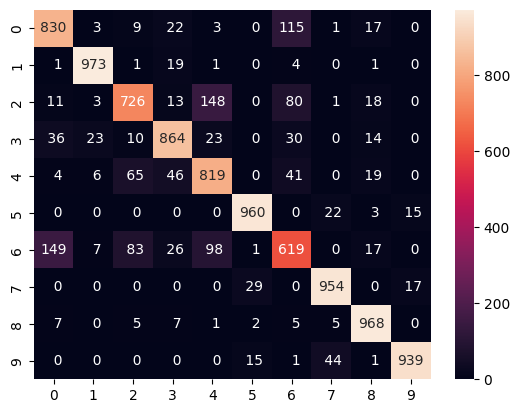

In [45]:
from sklearn.metrics import *
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, result1),
                        annot = True, fmt = "3d")

print(classification_report(y_test, result1))
plt.show()

***

# 2. CNN

<center><img src = "https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg"  width = 800></center>

`fashion_mnist` 자료를 불러온 뒤 위와 같은 네트워크를 적합하라.

## 데이터 로드 및 전처리

In [46]:
(x_train, y_train), (x_test, y_test)  = fashion_mnist.load_data()

In [48]:
M, m = x_train.max(), x_train.min()

train_x = ((x_train-m)/(M-m)).reshape(-1, 28, 28, 1)
test_x = ((x_test-m)/(M-m)).reshape(-1, 28, 28, 1)

## 모델 설계 1

이때 n1=6, n2=16, n3=120 으로 설정한다, 드랍아웃비율은 20%로 설정한다.

In [63]:
model  = Sequential()

model.add(Conv2D(filters = 6, kernel_size = (5 ,5), input_shape = (28, 28, 1), padding = "valid")) ## 패딩은 "valid"가 기본값
model.add(MaxPool2D(pool_size = (2,2),  padding = "valid")) ## 패딩과 pool_size는 입력한 값이 디폴트임
model.add(Conv2D(16, (5, 5)))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(120, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer = Adam(0.001), loss = "sparse_categorical_crossentropy", metrics = ["acc"])

In [64]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 120)              

## 모델 설계 2

 n1=(6,64,128), n2=(16,256)에 대하여 test set의 loss가 최소화되는 조합을 찾아라.

* epoc = 3, validation = 0.2로 설정

In [67]:
n1 = [6, 64, 128]
n2 = [16, 256]

for i in n1 :
  for j in n2 :
      model  = Sequential()
      model.add(Conv2D(filters = i, kernel_size = (5 ,5), input_shape = (28, 28, 1), padding = "valid")) ## 패딩은 "valid"가 기본값
      model.add(MaxPool2D(pool_size = (2,2),  padding = "valid")) ## 패딩과 pool_size는 입력한 값이 디폴트임
      model.add(Conv2D(j, (5, 5)))
      model.add(MaxPool2D())
      model.add(Flatten())
      model.add(Dense(120, activation = "relu"))
      model.add(Dropout(0.2))
      model.add(Dense(10, activation = "softmax"))

      model.compile(optimizer = Adam(0.001), loss = "sparse_categorical_crossentropy", metrics = ["acc"])
      model.fit(train_x, y_train, validation_split = 0.2, epochs = 3, verbose = 0)

      result = model.evaluate(test_x, y_test)
      print(f"n1 : {i}, n2 : {j} -> loss : {result[0]}, acc  :  {result[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3501 - acc: 0.8754
n1 : 6, n2 : 16 -> loss : 0.3500571548938751, acc  :  0.8754000067710876
313/313 [==============================] - 1s 2ms/step - loss: 0.3233 - acc: 0.8802
n1 : 6, n2 : 256 -> loss : 0.32328951358795166, acc  :  0.8802000284194946
313/313 [==============================] - 1s 3ms/step - loss: 0.3424 - acc: 0.8788
n1 : 64, n2 : 16 -> loss : 0.34240153431892395, acc  :  0.8787999749183655
313/313 [==============================] - 1s 3ms/step - loss: 0.3065 - acc: 0.8891
n1 : 64, n2 : 256 -> loss : 0.30652520060539246, acc  :  0.8891000151634216
313/313 [==============================] - 1s 3ms/step - loss: 0.3387 - acc: 0.8804
n1 : 128, n2 : 16 -> loss : 0.3387366831302643, acc  :  0.8804000020027161
313/313 [==============================] - 1s 4ms/step - loss: 0.3110 - acc: 0.8912
n1 : 128, n2 : 256 -> loss : 0.31100359559059143, acc  :  0.8912000060081482


`-` 64, 256 일 때 test_loss가 가장 작음

# 3. CIFAR10

`-`  데이터를 로드 후 모델을 자유롭게 설계해서 testset의 정확도를 70%이상 확보

## 데이터 로드 및 전처리

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape, y_train.shape, x_test. shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
train_x = x_train/255.0
test_x = x_test/255.0

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [5]:
y_test.shape

(10000,)

##  모델 설계

In [20]:
model  = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (32,32, 3)))
model.add(Conv2D(32, (3,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = (2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3,3)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPool2D((2, 2), strides = (2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer = Adam(0.001), loss = "sparse_categorical_crossentropy", metrics = ["acc"])

In [21]:
es = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 5)
ch = ModelCheckpoint(filepath = "CIFAR.h5", monitor = "val_loss", verbose = 1,  save_best_only= True )

In [22]:
model.fit(train_x, y_train, epochs = 30, validation_split = 0.2, callbacks = [es, ch])

Epoch 1/30
1243/1250 [============================>.] - ETA: 0s - loss: 1.6670 - acc: 0.4495
Epoch 1: val_loss improved from inf to 2.01761, saving model to CIFAR.h5
1250/1250 [==============================] - 13s 7ms/step - loss: 1.6649 - acc: 0.4503 - val_loss: 2.0176 - val_acc: 0.3802
Epoch 2/30
  10/1250 [..............................] - ETA: 7s - loss: 1.4683 - acc: 0.4750 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - ETA: 0s - loss: 1.2204 - acc: 0.5806
Epoch 2: val_loss improved from 2.01761 to 1.30872, saving model to CIFAR.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2204 - acc: 0.5806 - val_loss: 1.3087 - val_acc: 0.5842
Epoch 3/30
1243/1250 [============================>.] - ETA: 0s - loss: 1.0502 - acc: 0.6359
Epoch 3: val_loss improved from 1.30872 to 1.11962, saving model to CIFAR.h5
1250/1250 [==============================] - 8s 7ms/step - loss: 1.0508 - acc: 0.6355 - val_loss: 1.1196 - val_acc: 0.6230
Epoch 4/30
1245/1250 [============================>.] - ETA: 0s - loss: 0.9571 - acc: 0.6714
Epoch 4: val_loss improved from 1.11962 to 0.93383, saving model to CIFAR.h5
1250/1250 [==============================] - 8s 7ms/step - loss: 0.9571 - acc: 0.6715 - val_loss: 0.9338 - val_acc: 0.6749
Epoch 5/30
1250/1250 [==============================] - ETA: 0s - loss: 0.8859 - acc: 0.6924
Epoch 5: val_loss improved from 0.93383

## 예측

In [24]:
model.evaluate(test_x, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9003 - acc: 0.7314


[0.9002749919891357, 0.7314000129699707]

## 모델 로드 후 예측 결과 시각화

In [25]:
load_model = load_model("CIFAR.h5")

In [27]:
import numpy as np
pred = np.argmax(load_model.predict(test_x), axis = 1)

313/313 [==============================] - 2s 5ms/step


<Axes: >

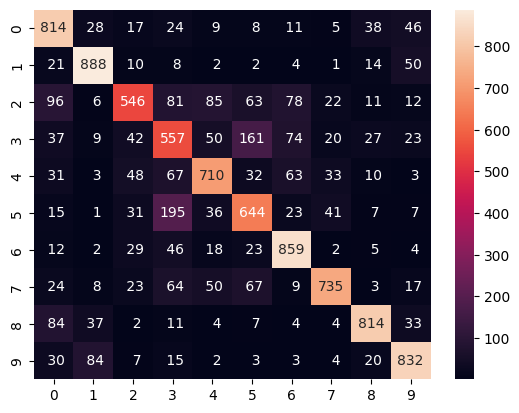

In [30]:
import seaborn as sns
from sklearn.metrics import *

sns.heatmap(confusion_matrix(y_test, pred),
                                                      annot = True, fmt = "3d")